In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

a = pd.Series([1,3,5,np.nan,6,8])
a

np_a = np.array([2,4,6,np.nan,8,10])
a1 = pd.Series(np_a)
a1


0     2.0
1     4.0
2     6.0
3     NaN
4     8.0
5    10.0
dtype: float64

In [2]:
dic = {'a':0, 'b':1, 'c':2}
pd.Series(dic)
### Dictionary to Pandas 경우 Dictionary Key가 Index가 된다.

a    0
b    1
c    2
dtype: int64

In [3]:
states = ['Cal','Ohi','Ore','Tex']
sdata = {'Ohi':35000, 'Tex':71000, 'Ore':16000, 'Uta':5000}
b = pd.Series(sdata, index=states)
b
### Index에 포함된 데이터만 적재된다!!

Cal        NaN
Ohi    35000.0
Ore    16000.0
Tex    71000.0
dtype: float64

In [4]:
pd.isnull(b)
b.isnull()

pd.notnull(b)
b.notnull()

## null check or not null check

Cal    False
Ohi     True
Ore     True
Tex     True
dtype: bool

In [5]:
sales_stats={'No':['a','b','c','d','e','f'],'Day':[1,2,3,4,5,6],'Visitors':[43,45,33,43,78,44],'Revenue':[64,73,62,64,53,66]}
df = pd.DataFrame(sales_stats)
df

,No,Day,Visitors,Revenue
0,a,1,43,64
1,b,2,45,73
2,c,3,33,62
3,d,4,43,64
4,e,5,78,53
5,f,6,44,66


In [6]:
## row operation
df.loc[0]
df.loc[:3]
df.loc[3:]

## col operation
df['Visitors']

## col + row operation
df['Visitors'].loc[3:]
df.loc[3:]['Visitors']

3    43
4    78
5    44
Name: Visitors, dtype: int64

In [7]:
df = df.set_index('No')
df

,Day,Visitors,Revenue
No,,,
a,1,43,64
b,2,45,73
c,3,33,62
d,4,43,64
e,5,78,53
f,6,44,66


In [8]:
df.loc['a']  ## No 컬럼의 값 기준 row 검색
df.iloc[1]  ## index 값 기준 row 검색

Day          2
Visitors    45
Revenue     73
Name: b, dtype: int64

In [9]:
df[df['Visitors']>40]
df[(df['Visitors']>40) | (df['Revenue']>70)]
df[(df['Visitors']>40) & (df['Revenue']>70)]
## Multi-Condition이면 ()로 구분해줘야 함 

,Day,Visitors,Revenue
No,,,
b,2,45,73


In [10]:
df[['Visitors','Revenue']]
pd.DataFrame(df, columns=['Visitors','Revenue'])
## column projection은 column list를 넣어줘야 함

,Visitors,Revenue
No,,
a,43,64
b,45,73
c,33,62
d,43,64
e,78,53
f,44,66


In [11]:
df2 = pd.DataFrame(df, columns=['Visitors','Revenue','Debt'])
## 신규 DataFrame을 만들면서 컬럼추가 가능함, 추가된 컬럼은 NaN 할당
df2

df2 = df2.drop('Debt',axis=1) ## axis=1의 의미는 모든 row에 대해 Debt 값을 삭제한다는 뜻.
## axis=0 이면 모든 column에 대해 삭제
df2

,Visitors,Revenue
No,,
a,43,64
b,45,73
c,33,62
d,43,64
e,78,53
f,44,66


In [12]:
df2.loc['g'] = [99,99]
df2
## row 추가, index 기준으로 나머지 값을 입력한다 (similar Dictionary)

df2.drop('g', axis=0)
## axis=0의 의미는 모든 column에 대해 g row값을 제거하겠다는 뜻

,Visitors,Revenue
No,,
a,43,64
b,45,73
c,33,62
d,43,64
e,78,53
f,44,66


In [13]:
newColumns={'Visitors':'NewVisitors','Revenue':'NewRevenue'}
df3 = df2.rename(columns=newColumns)
df3

## column명 변경방법 (dictionary로 일괄 변경해야함)

,NewVisitors,NewRevenue
No,,
a,43,64
b,45,73
c,33,62
d,43,64
e,78,53
f,44,66
g,99,99


In [14]:
df3 = df3.rename(index={'a':'aa'})
df3
## index명 변경방법 (dictionary로 변경해야 함)

,NewVisitors,NewRevenue
No,,
aa,43,64
b,45,73
c,33,62
d,43,64
e,78,53
f,44,66
g,99,99


In [15]:
df2[df2['Visitors'] > 50].count()

df2['Revenue'].mean()

df2.cov()

df2['Visitors'].median()

## 기본통계함수 제공됨 (avg, min, max, std, mean, median, var, count 등등)

44.0

In [16]:
df4 = pd.DataFrame(np.array([[1,2,3],[4,5,6],[7,8,9]]), columns=['A','B','C'])

for index, row in df4.iterrows():
    print(index, row['A'],row['B'],row['C'])
    
### loop 돌릴때는 iterrows() 함수를 사용하고, Return값은 index와 row

0 1 2 3
1 4 5 6
2 7 8 9


In [17]:
df5 = pd.DataFrame({
    'A':['f','b','f','b','f','b','f','f'],
    'B':['one','one','two','three','two','two','one','three'],
    'C':np.random.randn(8),
    'D':np.random.randn(8)    
})
grouped = df5.groupby('B')
grouped.mean()
grouped.sum()

## groupby 옵션 사용시 별도의 변수를 groupby에 할당해서 사용한다.

,C,D
B,,
one,0.263809,-0.408860
three,-0.918441,-0.324270
two,2.391320,1.575562


In [18]:
multi_groupby = df5.groupby(('A','B'))
multi_groupby.sum()
multi_groupby.median()
### multi-condition 조건에서 groupby 확인

grouped.get_group(('one'))
### groupby에서 특정 group의 값을 확인할때 사용

,A,C,D
0,f,0.660969,0.130640
1,b,-1.174406,0.397279
6,f,0.777246,-0.936779


In [19]:
df3.loc['g'] = [99,99]

result = pd.merge(df,df3, on='No')
result

### merge는 무조건 inner join 이다

pd.merge(df3, df, left_index=True, right_index=False, right_on='No', how='outer')

### merge에서 outer를 하려면 how='outer' 옵션을 사용해야 함

,NewVisitors,NewRevenue,Day,Visitors,Revenue
No,,,,,
aa,43.0,64.0,NaN,NaN,NaN
b,45.0,73.0,2.0,45.0,73.0
c,33.0,62.0,3.0,33.0,62.0
d,43.0,64.0,4.0,43.0,64.0
e,78.0,53.0,5.0,78.0,53.0
f,44.0,66.0,6.0,44.0,66.0
g,99.0,99.0,NaN,NaN,NaN
a,NaN,NaN,1.0,43.0,64.0


In [20]:
date_str = ["2018,01,01","2018,01,04","2018,01,05","2018,01,06"]
i = pd.to_datetime(date_str)
i

DatetimeIndex(['2018-01-01', '2018-04-01', '2018-05-01', '2018-06-01'], dtype='datetime64[ns]', freq=None)

In [21]:
pd.date_range('2018-01-01','2018-02-01')
pd.date_range(start='2018-01-01', periods=30, freq='B' )
pd.date_range(start='2018-01-01', end='2018-01-07', freq='8h30min' )
### 날짜 자동 생성함수 date_range는 start, end, period, freq(주기) 옵션이 있다

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 08:30:00',
               '2018-01-01 17:00:00', '2018-01-02 01:30:00',
               '2018-01-02 10:00:00', '2018-01-02 18:30:00',
               '2018-01-03 03:00:00', '2018-01-03 11:30:00',
               '2018-01-03 20:00:00', '2018-01-04 04:30:00',
               '2018-01-04 13:00:00', '2018-01-04 21:30:00',
               '2018-01-05 06:00:00', '2018-01-05 14:30:00',
               '2018-01-05 23:00:00', '2018-01-06 07:30:00',
               '2018-01-06 16:00:00'],
              dtype='datetime64[ns]', freq='510T')

In [26]:
rng = pd.date_range('2018-01-01', periods=72, freq='H')
rng[:3]
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts[:3]

ts = ts.truncate(before='2018-01-01',after='2018-01-03')
ts.head()

### truncate 함수를 사용해서 필요없는 부분을 제거할 수 있다

2018-01-01 00:00:00   -0.111706
2018-01-01 01:00:00    0.204235
2018-01-01 02:00:00   -2.161234
2018-01-01 03:00:00    0.794066
2018-01-01 04:00:00   -0.294438
Freq: H, dtype: float64

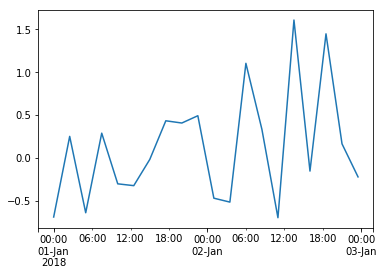

In [34]:
ts.resample('2h30min').mean().plot()

<BarContainer object of 5 artists>

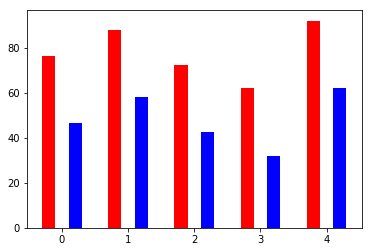

In [60]:
sc = {'uid':[3301,7105,7012,3622,3673],'mid':[90,93,73,47,92],'final':[63,83,72,77,92]}
ma = {'uid':[3301,7012,3673],'major':['CS','EE','CS']}

score = pd.DataFrame(sc)
major = pd.DataFrame(ma)


total = pd.merge(score, major, left_on='uid', right_on='uid', how='left')

total['total'] = total[['mid','final']].mean(axis=1)




import matplotlib.pyplot as plt


idx = np.arange(0,total['total'].count())
idx
plt.bar(idx-0.2,total['total'],width=0.2,color='r')
plt.bar(idx+0.2,total['total']-30,width=0.2,color='b')